### **Problem Statement:** To predict output of Combined cycle power plants (CCPP)

*   **Method:**
  1.   Conducted Exploratory Data Analysis (EDA) to find out correlation of variables to predicted output 'PE'
  2.   Utilized Machine Learning models to predict 'PE'
  3.   Evaluated performance of models and selected best model for deployment
  
*   **Approach:** Obtain data from 1997 to 2022 (Source: UCI Machine Learning Repository)

*   **Metric:** Measure overall loss based of predicted output of (PE) and the actual output in the year 2022 (Jan-Jun)



### **Step 1:** Import all relevant libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#mounting GDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Step 2:** Read dataset obtained from UCI Machine Learning Repository into a dataframe. Then, check and clean up data set, extracting data from 1997 to 2021.

In [3]:
path = '/content/drive/MyDrive/10. Python Projects/GITHUB/Project 2/Folds5x2_pp.xlsx'
df_org = pd.read_excel(path)

In [4]:
df_org.isna().sum().sum()

0

In [5]:
df_org['Date'] = pd.to_datetime(df_org['Date'])
df_org.set_index('Date', inplace=True)
df_org

,AT,V,AP,RH,PE
Date,,,,,
2022-07-01,14.96,41.76,1024.07,73.17,463.26
2022-06-30,25.18,62.96,1020.04,59.08,444.37
2022-06-29,5.11,39.40,1012.16,92.14,488.56
2022-06-28,20.86,57.32,1010.24,76.64,446.48
2022-06-27,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
1996-04-25,16.65,49.69,1014.01,91.00,460.03
1996-04-24,13.19,39.18,1023.67,66.78,469.62
1996-04-23,31.32,74.33,1012.92,36.48,429.57


In [6]:
# sorting data in ascending order

df = df_org[(df_org.index >= '1997-01-01')]
df.sort_index(ascending = True, inplace = True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,


,AT,V,AP,RH,PE
Date,,,,,
1997-01-01,8.53,43.14,1012.25,78.88,480.08
1997-01-02,20.10,57.17,1011.96,87.68,452.67
1997-01-03,5.18,40.27,1010.84,81.64,489.10
1997-01-04,14.39,43.56,1012.97,59.17,469.35
1997-01-05,26.93,59.54,1004.02,75.50,437.58
...,...,...,...,...,...
2022-06-27,10.82,37.50,1009.23,96.62,473.90
2022-06-28,20.86,57.32,1010.24,76.64,446.48
2022-06-29,5.11,39.40,1012.16,92.14,488.56


In [7]:
# checking correlation of variables

df_corr =  df.corr()
df_corr['PE'].sort_values(ascending=False)

PE    1.000000
AP    0.518381
RH    0.388215
V    -0.869486
AT   -0.948282
Name: PE, dtype: float64

> #### High correlation between 'PE' and 'AT' observed.



In [9]:
# extracted data from 1997 to 2021

df_2021 = df[(df.index >= '1997-01-01')*(df.index < '2022-01-01')]

### **Step 3:** Using Machine Learning, train model to predict power output (PE) of power plant.

#### 3 different models were being tested out:
  1.   LinearRegression
  2.   DecisionTreeRegressor
  3.   RandomForestRegressor

In [10]:
# import relevant libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# function to run model and print results

def run_model(df, ls, model, target = 'PE'):
  
  X = df[ls] # independent variable
  y = df[target] # dependent variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('r2 score: ', r2_score(y_test, y_pred))

  plt.scatter(y_test, y_pred);
  plt.show()

  return model

In [12]:
# dictionary for storing models

model_dict =  {'LinearRegression': LinearRegression(), 
               'DecisionTreeRegressor': DecisionTreeRegressor(), 
               'RandomForestRegressor': RandomForestRegressor(),
               }

#### **Univariate Analysis:** Using 'AT'
*   Given that 'AT' has the highest correlation to PE.



LinearRegression
RMSE:  5.465885862636573
r2 score:  0.896347721126193


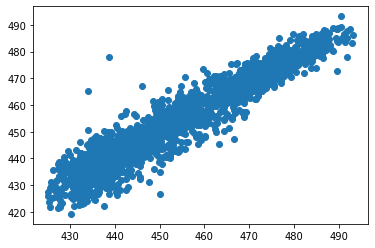

DecisionTreeRegressor
RMSE:  6.230559314816969
r2 score:  0.8653173021259226


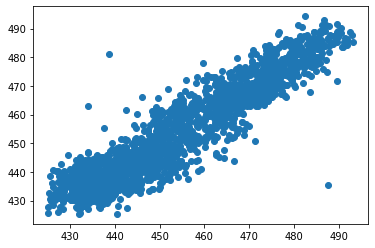

RandomForestRegressor
RMSE:  5.902136385732211
r2 score:  0.8791417728426162


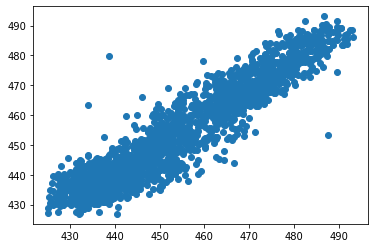

In [13]:
ls_1 = ['AT']

for name , model in model_dict.items():
  
  print(name)
  model = run_model(df_2021, ls_1, model)

> #### **Analysis Results:** LinearRegression and RandomForestRegressor models performs better in the univariate analysis.



#### **Multivariate Analysis:** Using all variables related to PE
*   Although AT has the highest correlation, a multivariate analysis is also carried out to see the relation of all variables to PE.


LinearRegression
RMSE:  4.575762881784436
r2 score:  0.9273585073370677


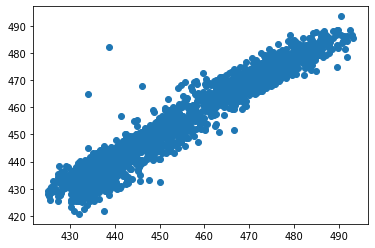

DecisionTreeRegressor
RMSE:  4.741332056091338
r2 score:  0.9220064871682343


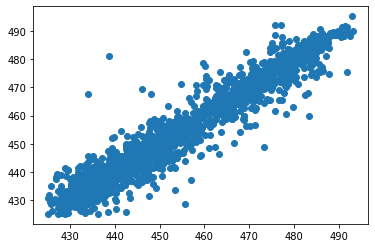

RandomForestRegressor
RMSE:  3.39017209548674
r2 score:  0.9601249512195695


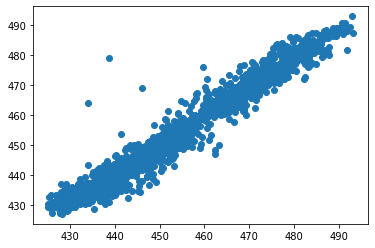

In [14]:
ls_2 = ['AT', 'V', 'AP', 'RH']

for name , model in model_dict.items():
  
  print(name)
  model = run_model(df_2021, ls_2, model)

> #### **Analysis Results:** RandomForestRegressor performs the best when tested against multiple variables.

In [15]:
# checking actual correlation of all variables to PE

model_rfr = model_dict.get('RandomForestRegressor')

df_corr_rfr = pd.DataFrame(model_rfr.feature_importances_, model_rfr.feature_names_in_, columns = ['Feature_Importance'])
df_corr_rfr

,Feature_Importance
AT,0.906545
V,0.057040
AP,0.018959
RH,0.017456


#### **Predicting & Comparing 2022 PE predicted vs actual results**

*   Variables used: All except 'PE'



In [31]:
target = 'PE'
X = df[df.columns.difference([target])]
y = df[target]

X_train_2022 = X[(X.index < '2022-01-01')]
X_test_2022 = X[(X.index >= '2022-01-01')]
y_train_2022 = y[(y.index < '2022-01-01')]
y_test_2022 = y[(y.index >= '2022-01-01')]

X_train_2022.shape, X_test_2022.shape, y_train_2022.shape, y_test_2022.shape 

((9131, 4), (182, 4), (9131,), (182,))

In [32]:
# function to run model and print results

def run_model_pred(model, X_train, X_test, y_train, y_test):

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

  return y_pred, model

In [33]:
y_pred_ls = []
for name , model in model_dict.items():
  
  print(name)
  y_pred, model = run_model_pred(model, X_train_2022, X_test_2022, y_train_2022, y_test_2022);
  y_pred_ls.append([y_pred, model])

LinearRegression
RMSE:  4.348149350411754
DecisionTreeRegressor
RMSE:  4.423196782895802
RandomForestRegressor
RMSE:  3.1465885168275136


> #### RandomForestRegressor model provides a better prediction based on overall minimum loss.



#### Calculate mean difference between each predicted result for 2022
*   Excluded DecisionTreeRegressor model's predicted results due to poor performance.




In [50]:
df_ytest = y_test_2022.to_frame()
df_ytest['y_pred_lr'] = y_pred_ls[0][0]
df_ytest['y_pred_rf'] = y_pred_ls[2][0]
df_ytest.describe()

,PE,y_pred_lr,y_pred_rf
count,182.000000,182.000000,182.000000
mean,454.925000,454.923434,454.857761
std,16.507486,16.297923,16.677219
min,426.560000,424.019866,428.307100
25%,441.732500,441.956018,441.807100
50%,450.835000,451.817659,450.830400
75%,468.927500,469.523559,468.189675
max,495.240000,487.606359,494.515000


#### Check in the month of Feb:

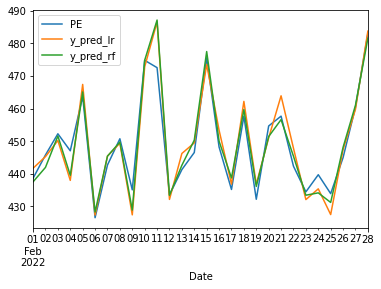

In [51]:
df_ytest[(df_ytest.index >= '2022-02-01') & (df_ytest.index < '2022-03-01') ].plot();

#### Check in the month of May:

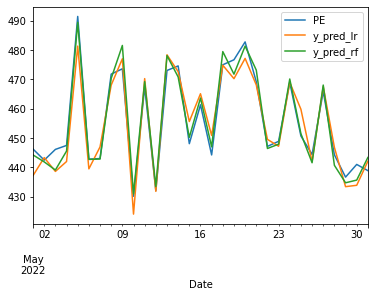

In [52]:
df_ytest[(df_ytest.index >= '2022-05-01') & (df_ytest.index < '2022-06-01') ].plot();

### **Conclusion:**

* Based on the overall mean, RandomForestRegressor model which utilized more data points provided a more accurate prediction of 'PE' as compared to a linear model, which utilized a negative relation between 'AT' and 'PE'.